# Chapter 1 - Time-Series Characteristics

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Detecting Trend Using a Hodrick-Prescott Filter

The Hodrick-Prescott (HP) filter has become a benchmark for getting
rid of trend movements in data. This method is broadly employed
for econometric methods in applied macroeconomics research. The
technique is nonparametric and is used to dissolve a time series into a
trend; it is a cyclical component unaided by economic theory or prior
trend specification. Like all nonparametric methods, the HP filter is
contingent significantly on a tuning parameter that controls the degree of
smoothing. This method is broadly employed in applied macroeconomics
utilized in central banks, international economics agencies, industry, and
government.

In [2]:
df = pd.read_excel('data/India_Exchange_Rate_Dataset.xls', index_col=0, parse_dates=True)
df

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927
...,...
2019-07-01,68.7391
2019-08-01,71.1891
2019-09-01,71.3110


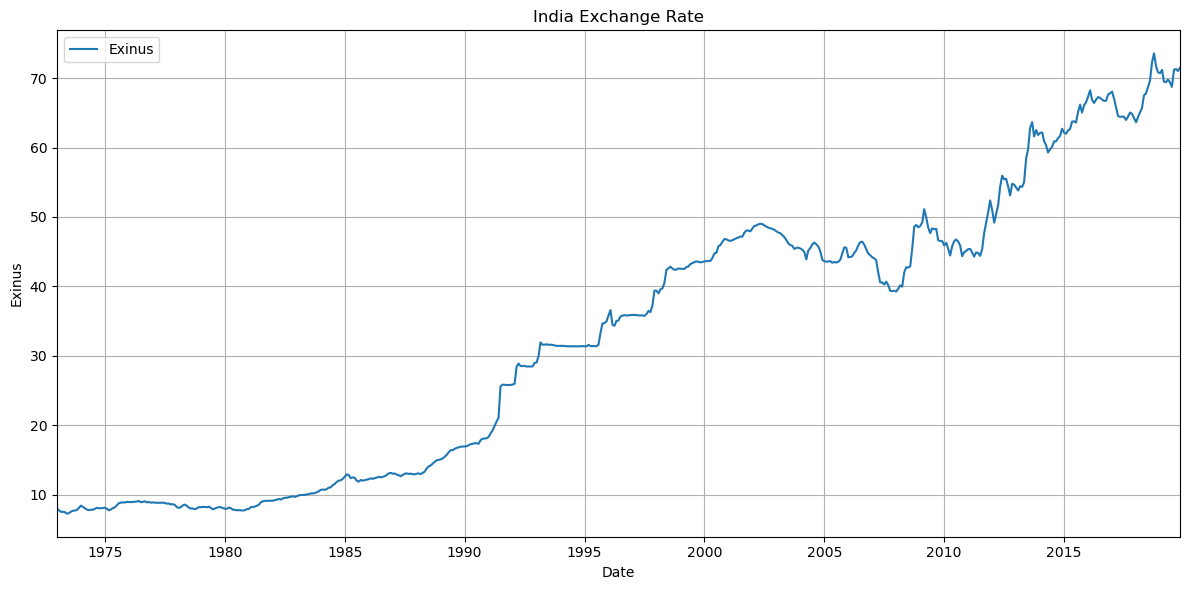

In [3]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['EXINUS'], label='Exinus')     

plt.title('India Exchange Rate')                      
plt.xlabel('Date')                                        
plt.ylabel('Exinus')  
plt.xlim(pd.to_datetime('1973-01-01'), pd.to_datetime('2019-11-01'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter

EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)

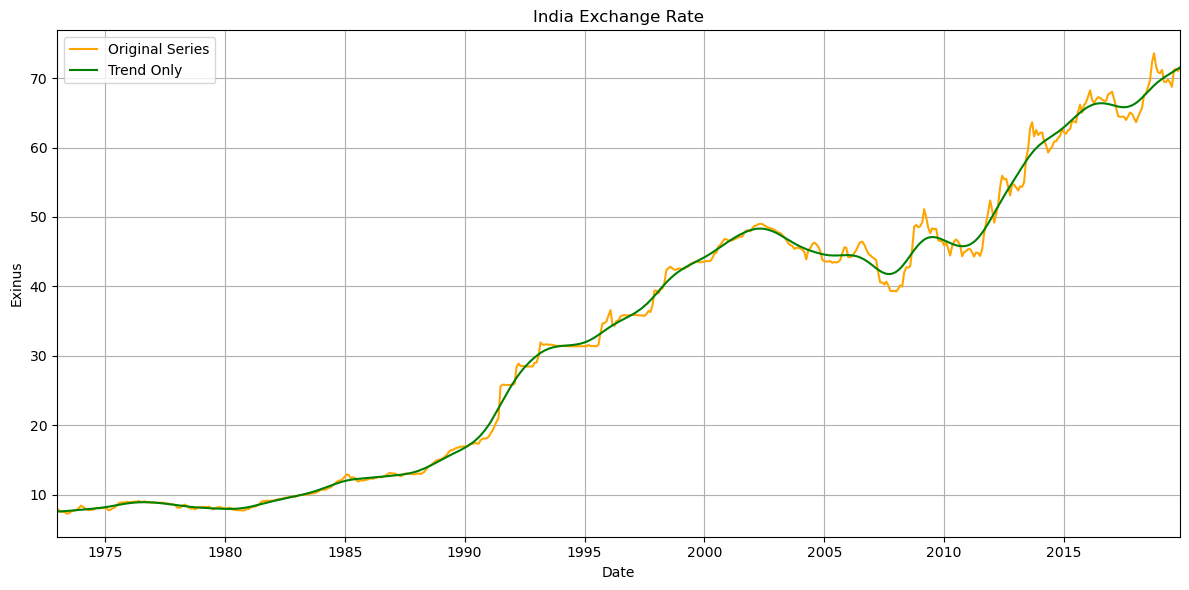

In [5]:
# Plot series
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['EXINUS'], label='Original Series', color='orange')  
plt.plot(df.index,EXINUS_trend, label='Trend Only', color='green')     

plt.title('India Exchange Rate')                      
plt.xlabel('Date')                                        
plt.ylabel('Exinus')  
plt.xlim(pd.to_datetime('1973-01-01'), pd.to_datetime('2019-11-01'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

### Detrending Using Pandas Differencing

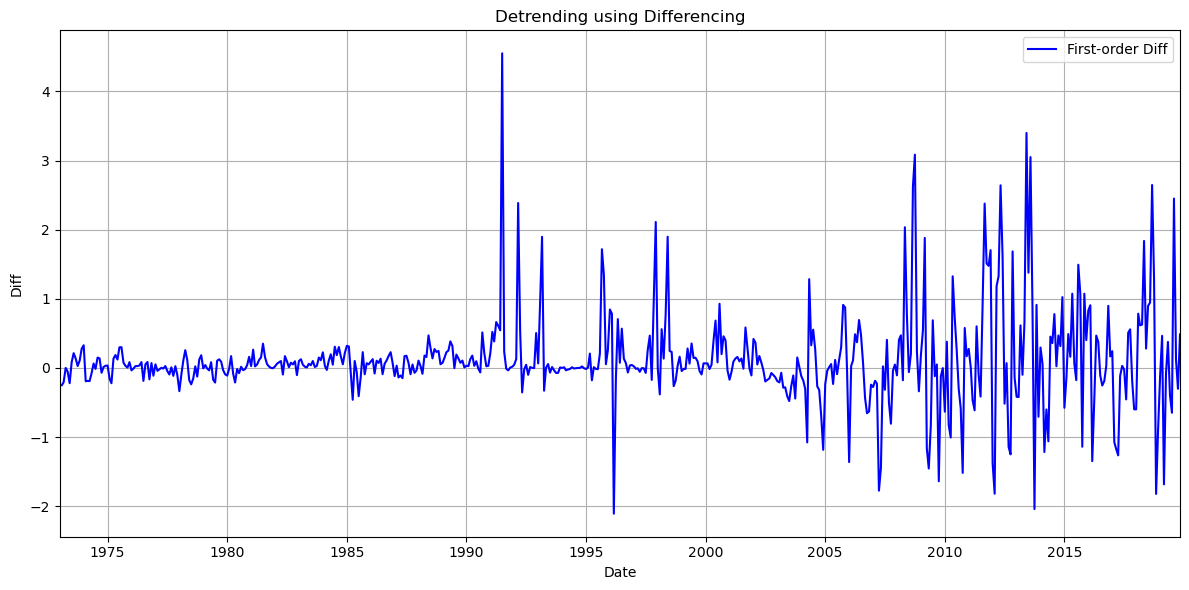

In [6]:
diff = df['EXINUS'].diff()

# Plot series
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, diff, label='First-order Diff', color='blue')     

plt.title('Detrending using Differencing')                      
plt.xlabel('Date')                                        
plt.ylabel('Diff')  
plt.xlim(pd.to_datetime('1973-01-01'), pd.to_datetime('2019-11-01'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

### Detrending Using a SciPy Signal

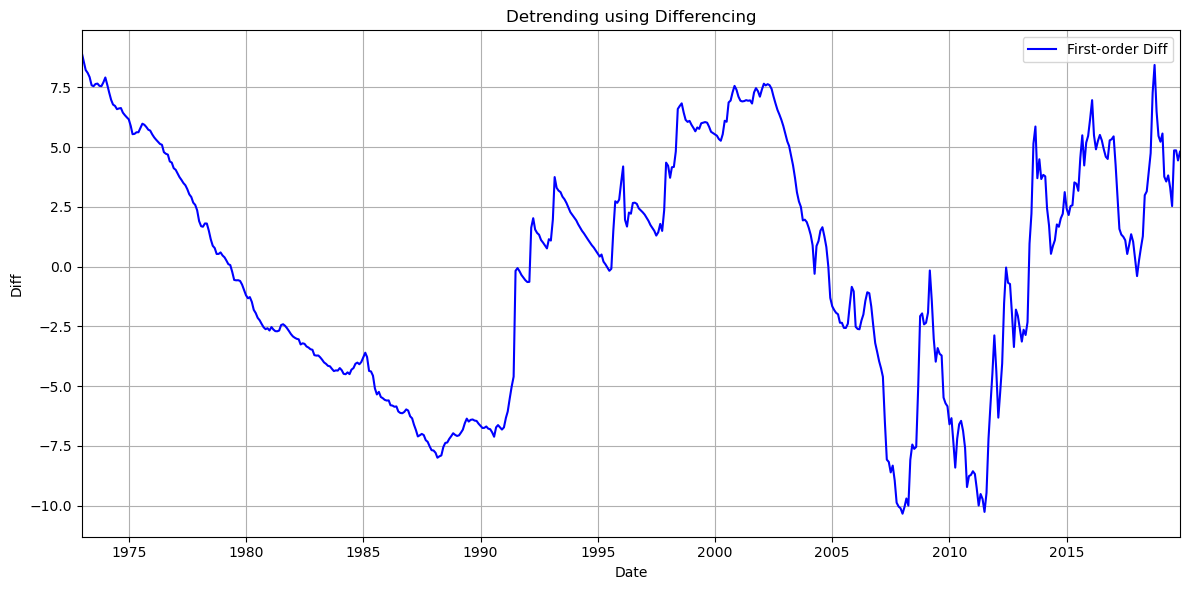

In [7]:
from scipy import signal


detrended = signal.detrend(df['EXINUS'].values)

# Plot series
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, detrended, label='First-order Diff', color='blue')     

plt.title('Detrending using Differencing')                      
plt.xlabel('Date')                                        
plt.ylabel('Diff')  
plt.xlim(pd.to_datetime('1973-01-01'), pd.to_datetime('2019-11-01'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

### Detrend Using an HP Filter
An HP filter is also used to detrend a time series and smooth the data. It’s used for removing short-term fluctuations.

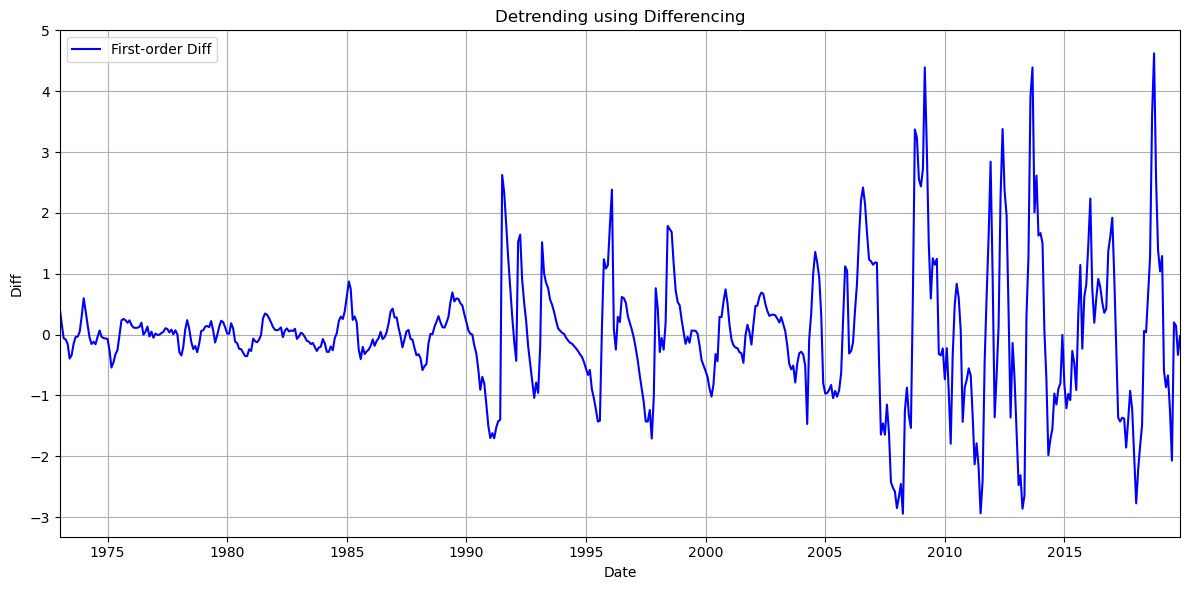

In [8]:
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
df['trend'] = EXINUS_trend
detrended2 = df['EXINUS'] - df['trend']

# Plot series
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, detrended2, label='First-order Diff', color='blue')     

plt.title('Detrending using Differencing')                      
plt.xlabel('Date')                                        
plt.ylabel('Diff')  
plt.xlim(pd.to_datetime('1973-01-01'), pd.to_datetime('2019-11-01'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

### Multiple Box Plots

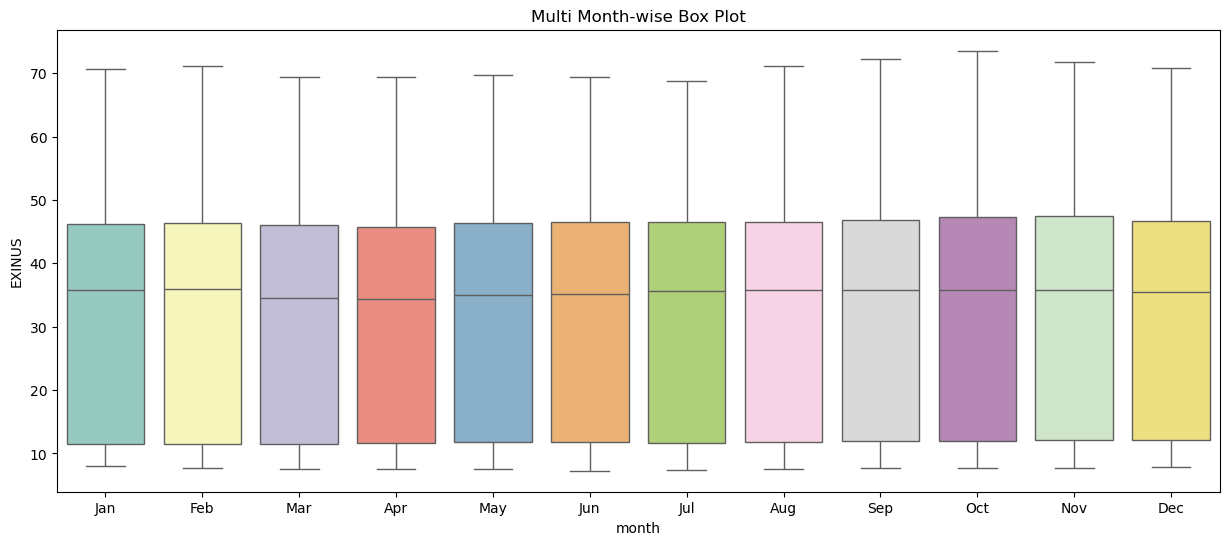

In [9]:
df['month'] = df.index.strftime('%b')   # Extract abbreviated month from the index
df['year'] = df.index.year              # Extract year from the index
years = df['year'].unique()             # Get list of unique years

plt.figure(figsize=(15,6))
sns.boxplot(hue = 'month', x='month', y='EXINUS', data=df, palette="Set3").set_title("Multi Month-wise Box Plot")
plt.show();

### Autocorrelation Plot

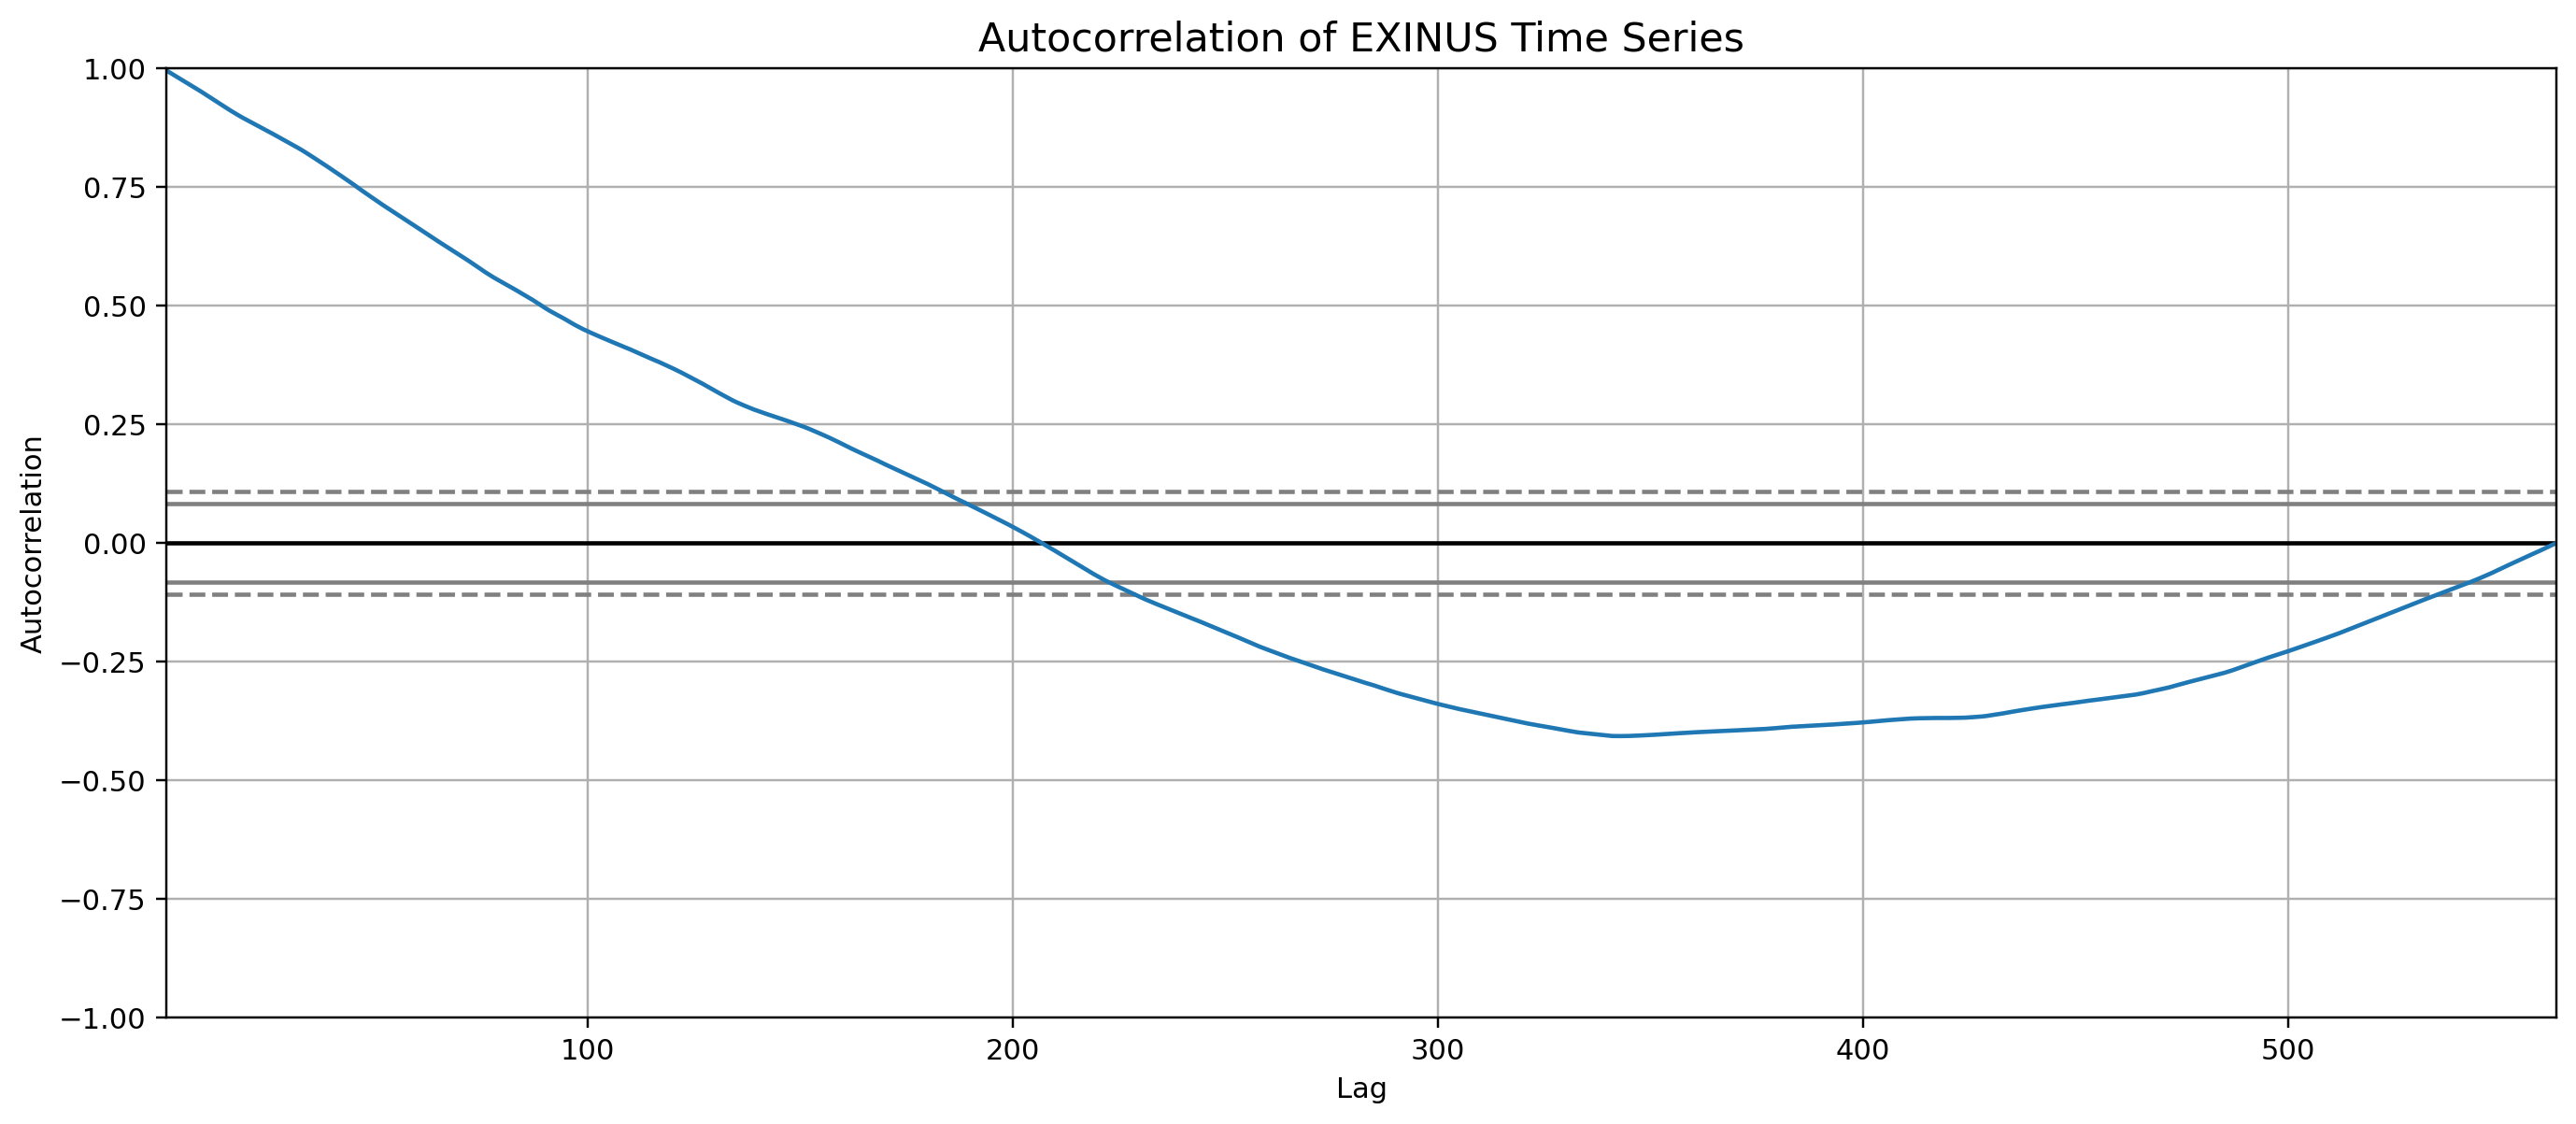

In [10]:
from pandas.plotting import autocorrelation_plot


# Set plotting parameters
plt.rcParams.update({'figure.figsize': (15, 6), 'figure.dpi': 220})

# Plot autocorrelation using the Series directly
autocorrelation_plot(df['EXINUS'])
plt.title("Autocorrelation of EXINUS Time Series", fontsize=14)
plt.show();

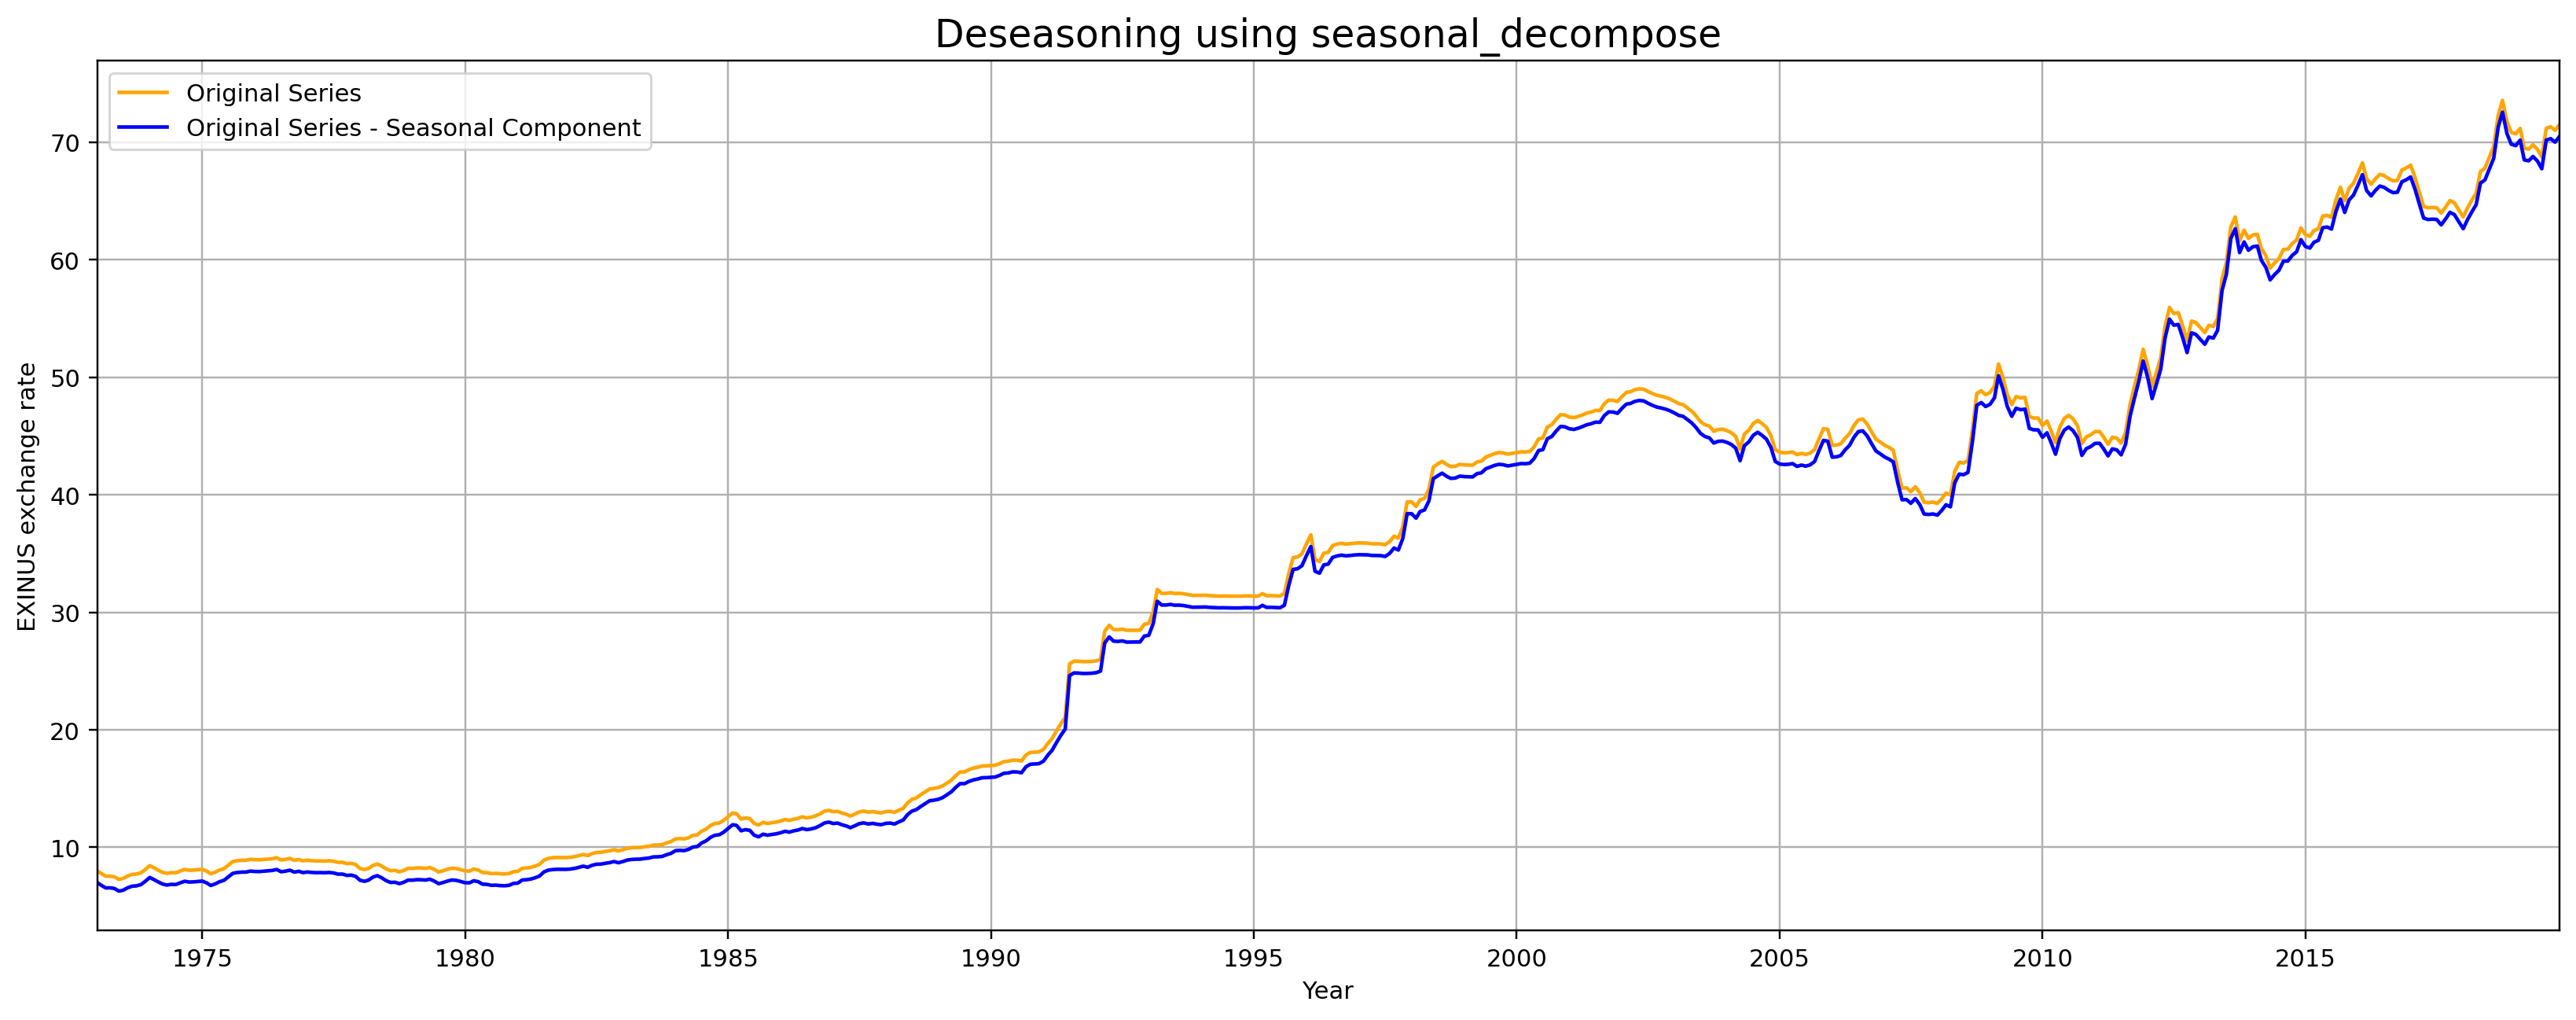

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['EXINUS'], model='multiplicative', extrapolate_trend='freq')

deseason = df['EXINUS'] - result_mul.seasonal

plt.figure(figsize=(15,6))

plt.plot(df.index, df['EXINUS'], label='Original Series', color='orange')  
plt.plot(df.index, deseason, label='Original Series - Seasonal Component', color='blue')  

plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.xlim(pd.to_datetime('1973-01-01'), pd.to_datetime('2019-11-01'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

### Detecting Cyclical Variations

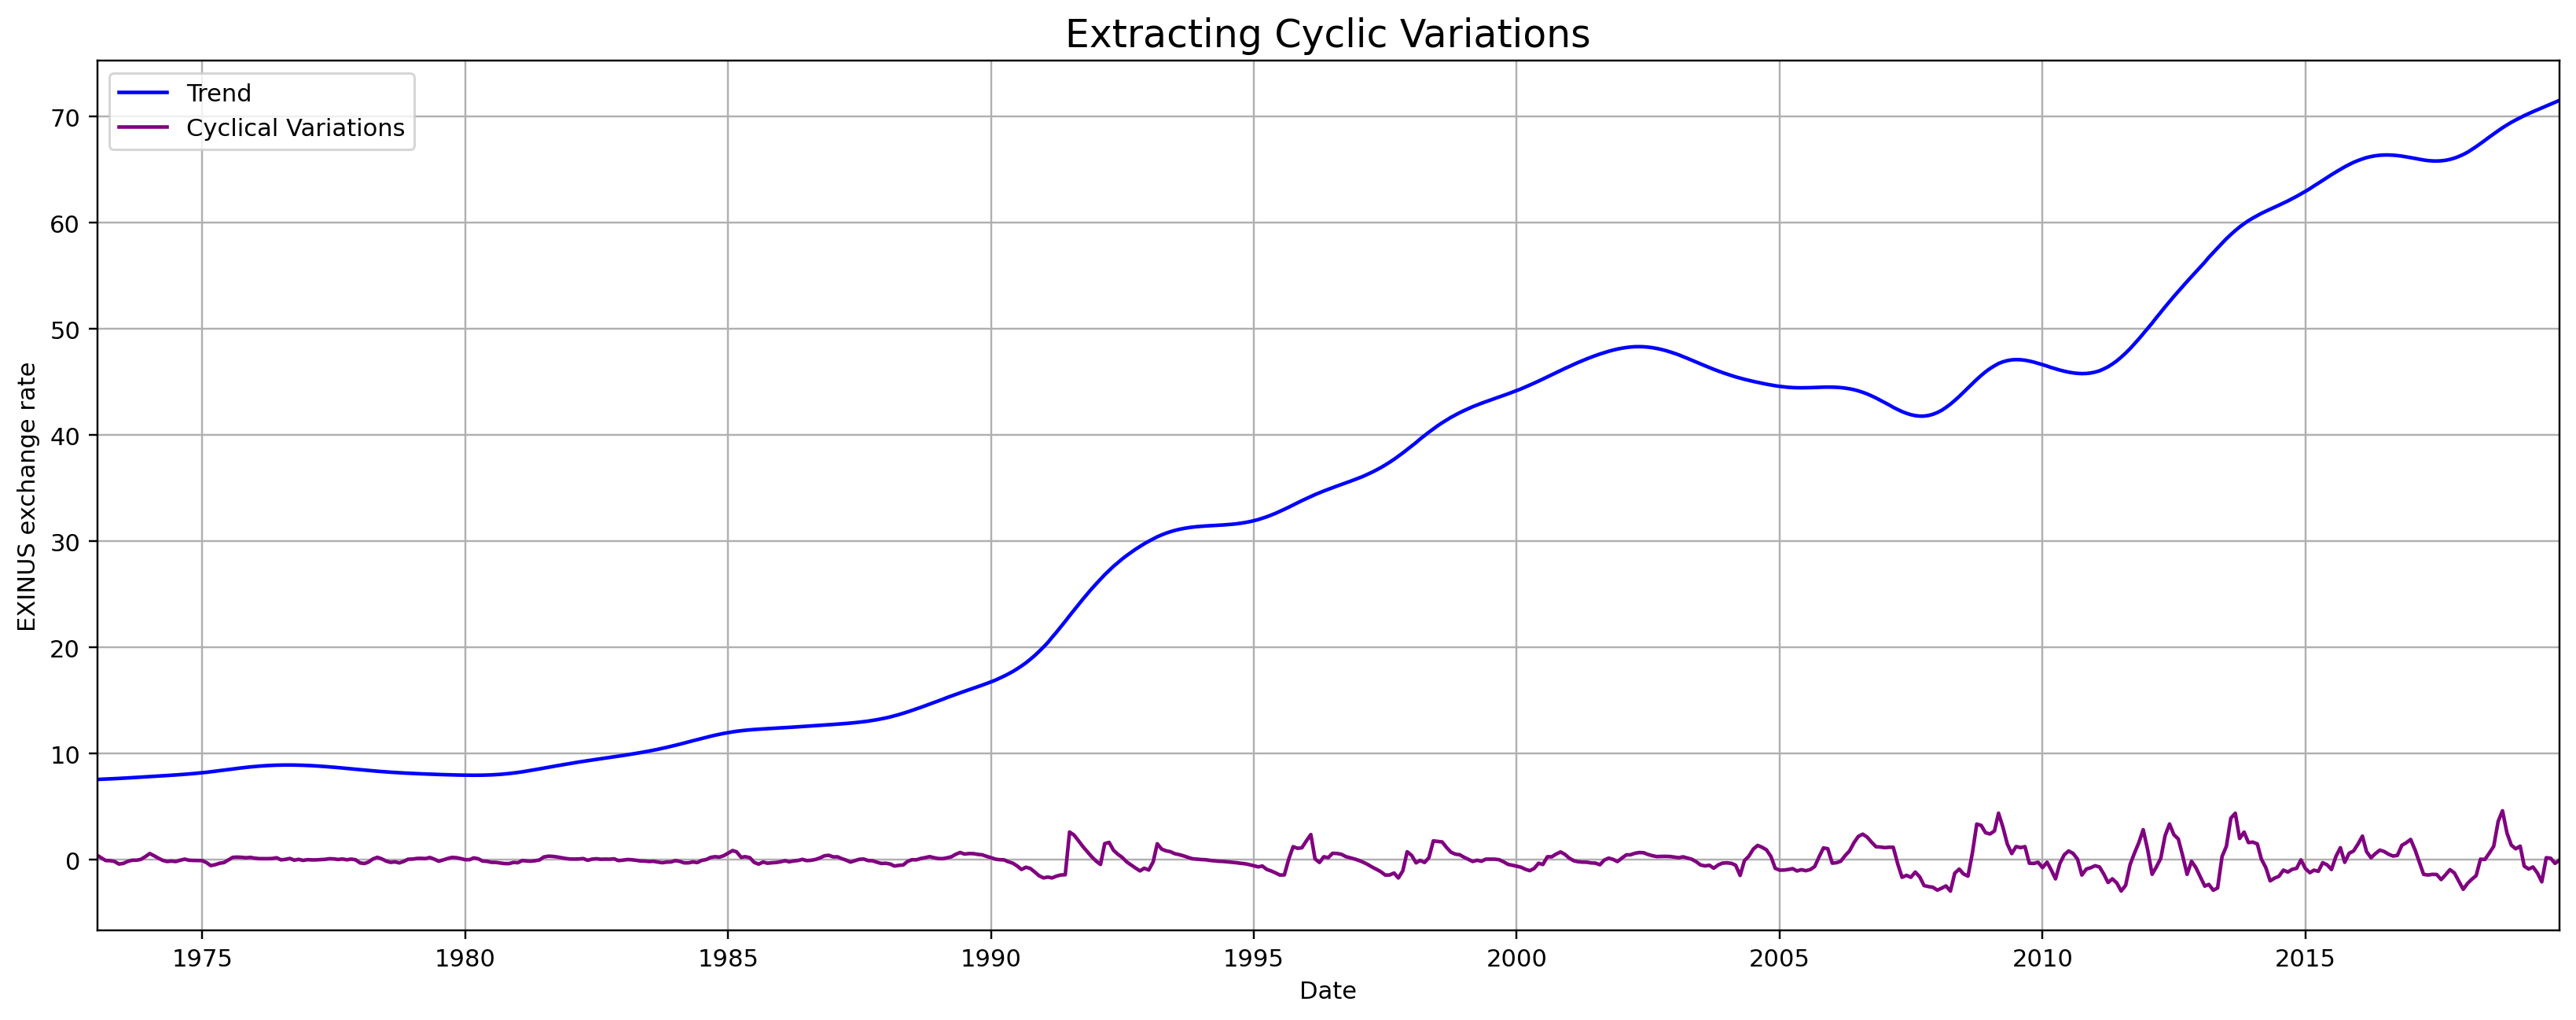

In [12]:
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)

df['cycle'] =EXINUS_cycle
df['trend'] =EXINUS_trend

plt.figure(figsize=(15,6))

plt.plot(df.index, df['trend'], label='Trend', color='blue') 
plt.plot(df.index, df['cycle'], label='Cyclical Variations', color='purple')   

plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Date')
plt.ylabel('EXINUS exchange rate')
plt.xlim(pd.to_datetime('1973-01-01'), pd.to_datetime('2019-11-01'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

### Decomposing a Time Series into Its Components

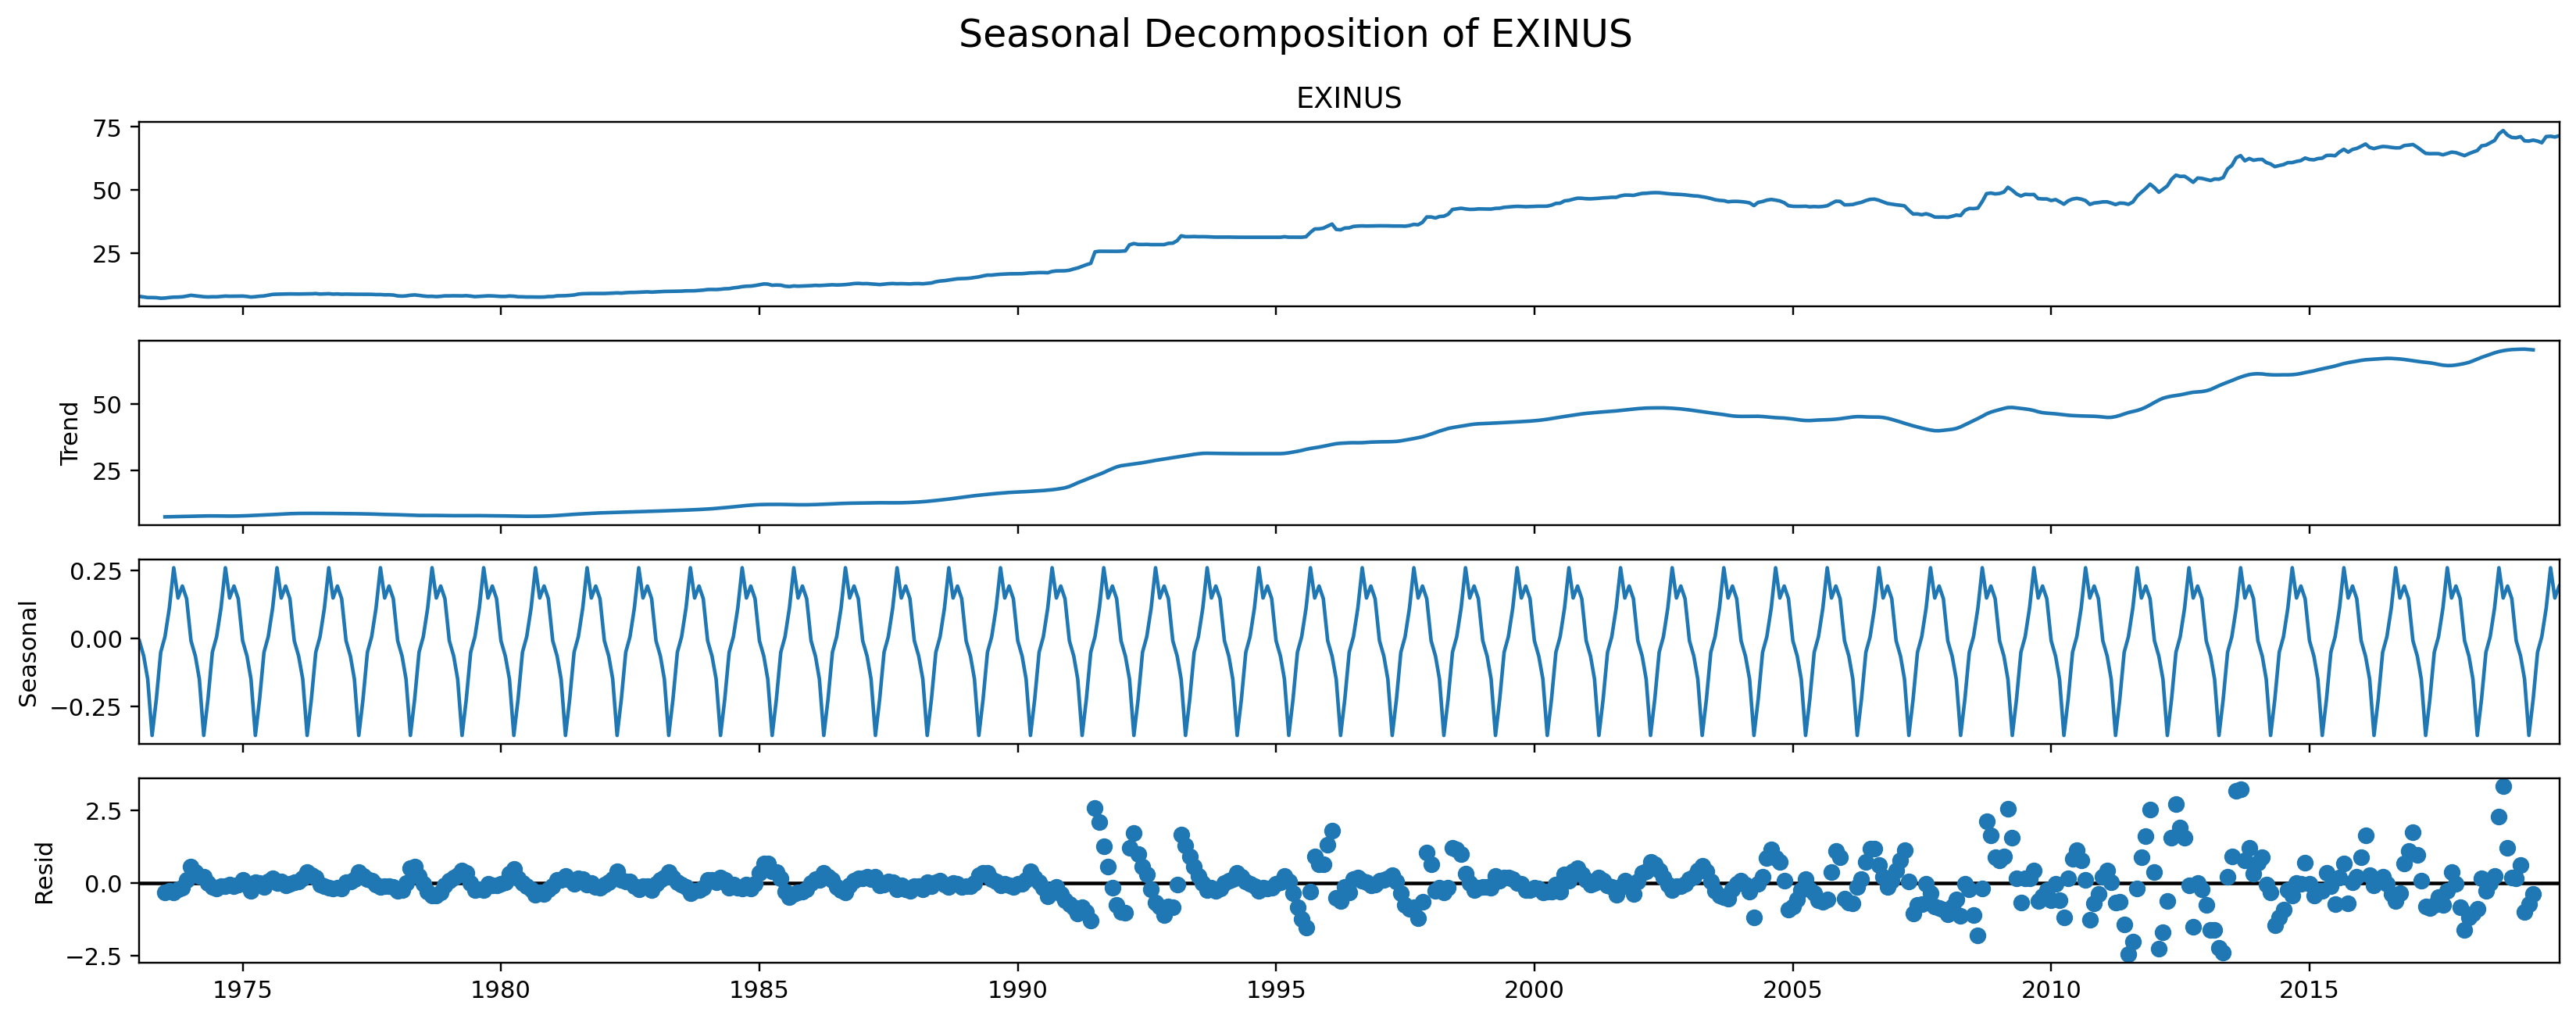

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Decompose the time series (multiplicative model)
result = seasonal_decompose(df['EXINUS'], model='aditive')  # or model='multiplicative'

# Plot the decomposition
result.plot()
plt.suptitle("Seasonal Decomposition of EXINUS", fontsize=16)  # Optional title
plt.tight_layout()
plt.show();

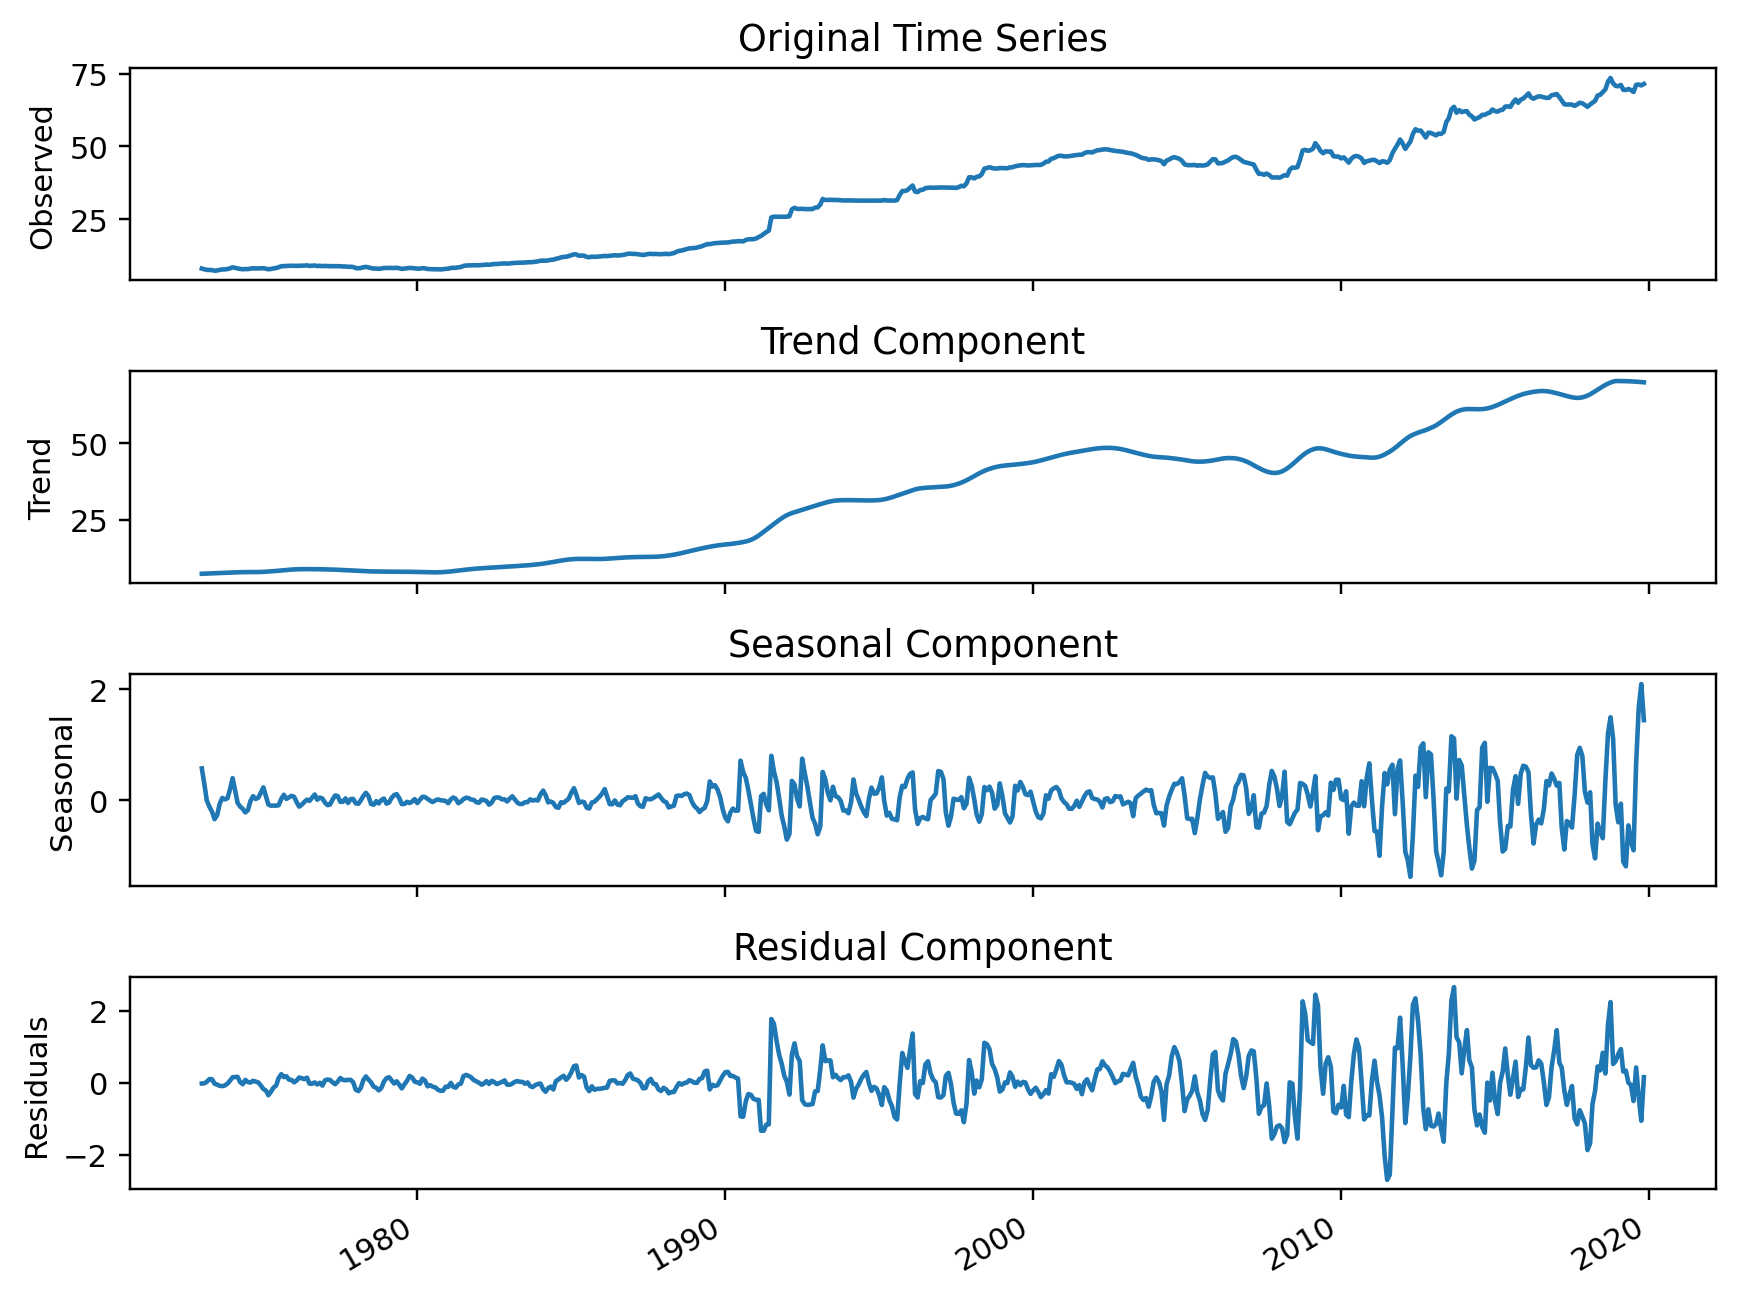

In [14]:
from statsmodels.tsa.seasonal import STL

decom_exinus = STL(df['EXINUS'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8,6))

ax1.plot(decom_exinus.observed)
ax1.set_ylabel('Observed')
ax1.set_title("Original Time Series")

ax2.plot(decom_exinus.trend)
ax2.set_ylabel('Trend')
ax2.set_title("Trend Component")

ax3.plot(decom_exinus.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_title("Seasonal Component")

ax4.plot(decom_exinus.resid)
ax4.set_ylabel('Residuals')
ax4.set_title("Residual Component")

fig.autofmt_xdate()
plt.tight_layout()
plt.show();